In [18]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%notebook inline

from glycemic_patterns.model import Model
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

files = ["ACN_20160331_20160414_FREE_STYLE.txt",
        "APD_20160620_20160704_FREE_STYLE.txt",
        "APD_20160706_20160721_FREE_STYLE.txt",
        "CAA_20160907_20160922_FREE_STYLE.txt",
        "DPE_20160520_20160803_FREE_STYLE.txt",
        "DSG_20160130_20160630_FREE_STYLE.txt",
        "MPA_20160404_20160428_FREE_STYLE.txt",
        "MPA_20160525_20160528_FREE_STYLE.txt",
        "SBF_20160404_20160408_FREE_STYLE.txt",
        "VGO_20160330_20160622_FREE_STYLE.txt"]

In [2]:
results = pd.DataFrame()

for filepath in files:
    num_rows = pd.read_csv('data/' + filepath, header=0, skiprows=1, delimiter="\t", index_col=0,
                                       usecols=list(range(0, 9)), decimal=",").shape[0]
    trees = Model('data/' + filepath)
    trees.fit()
    try:
        auc_hyper_dt = trees._hyper_dt.cross_val_score('roc_auc', cv=5, n_jobs=1)
    except:
        auc_hyper_dt = pd.np.nan
    try:
        auc_hypo_dt = trees._hypo_dt.cross_val_score('roc_auc', cv=5,  n_jobs=1)
    except:
        auc_hypo_dt = pd.np.nan
    try:
        auc_severe_hyper_dt = trees._severe_dt.cross_val_score('roc_auc', cv=5,n_jobs=1)
    except:
        auc_severe_hyper_dt = pd.np.nan
            
    results = results.append(
        pd.DataFrame(data=[[filepath[0:3], num_rows, auc_hyper_dt, auc_hypo_dt, auc_severe_hyper_dt]],
                    columns=["patient", "num_rows", "auc_hyper_dt", "auc_hypo_dt", "auc_severe_hyper_dt"]))
                    
results.to_csv('results.csv')

In [ ]:
results

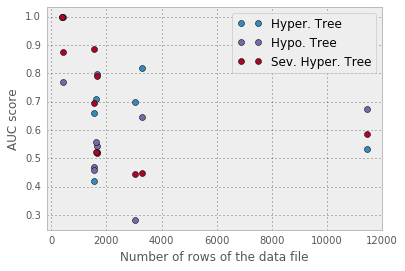

In [25]:
import matplotlib.pyplot as plt
# Plot
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(3, color_type='random')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
ax.plot(results.num_rows, results.auc_hyper_dt , marker='o', linestyle='', ms=6, label='Hyper. Tree')
ax.plot(results.num_rows, results.auc_hypo_dt, marker='o', linestyle='', ms=6, label='Hypo. Tree')
ax.plot(results.num_rows, results.auc_severe_hyper_dt, marker='o', linestyle='', ms=6, label='Sev. Hyper. Tree')
ax.legend()
ax.set_xlabel('Number of rows of the data file')
ax.set_ylabel('AUC score')
plt.show()

fig.savefig('scatter_auc_rows.png')

## Feature importance results

In [19]:
results_hyper_dt = pd.DataFrame()
results_hypo_dt  = pd.DataFrame()
results_severe_dt = pd.DataFrame()

for filepath in files:
    num_rows = pd.read_csv('data/' + filepath, header=0, skiprows=1, delimiter="\t", index_col=0,
                                       usecols=list(range(0, 9)), decimal=",").shape[0]
    trees = Model('data/' + filepath)
    trees.fit()
    results_hyper_dt = pd.concat([results_hyper_dt, trees._hyper_dt.feature_importances])
    results_hypo_dt = pd.concat([results_hypo_dt, trees._hypo_dt.feature_importances])
    results_severe_dt = pd.concat([results_severe_dt, trees._severe_dt.feature_importances])
    
results_hyper_dt = results_hyper_dt.mean()
results_hypo_dt = results_hypo_dt.mean()
results_severe_dt = results_severe_dt.mean()

W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


W0001: There are periods with an average number of carbohydrate registers (Type 5) lower than 3 per day.Patterns may not be accurate


In [20]:
print(results_hyper_dt)     
results_hyper_dt.to_csv('results_hyper_dt.csv')

Block                       0.000000
Carbo_Prev_Block_G          0.000000
Carbo_Prev_Block_U          0.030261
Delta_Glucose_Prev_Day      0.000000
Glucose_Auto                0.000000
Glucose_Auto_Prev_Day       0.000000
Glucose_Max_Prev_Block      0.155203
Glucose_Max_Prev_Day        0.114522
Glucose_Mean_Prev_Block     0.071682
Glucose_Mean_Prev_Day       0.139521
Glucose_Min_Prev_Block      0.000000
Glucose_Min_Prev_Day        0.043233
Glucose_Std_Prev_Block      0.126989
Glucose_Std_Prev_Day        0.030619
Hour                        0.008009
Last_Meal_Hour              0.000000
MAGE_Prev_Day               0.000000
Minutes_Last_Meal           0.003424
Overlapped_Block            0.000000
Rapid_Insulin_Prev_Block    0.061415
Weekday                     0.018147
dtype: float64


In [21]:
print(results_hypo_dt)   
results_hypo_dt.to_csv('results_hypo_dt.csv')

Block                       0.069627
Carbo_Prev_Block_G          0.000000
Carbo_Prev_Block_U          0.002386
Delta_Glucose_Prev_Day      0.000436
Glucose_Auto                0.000000
Glucose_Auto_Prev_Day       0.000000
Glucose_Max_Prev_Block      0.062936
Glucose_Max_Prev_Day        0.035195
Glucose_Mean_Prev_Block     0.074346
Glucose_Mean_Prev_Day       0.120589
Glucose_Min_Prev_Block      0.110990
Glucose_Min_Prev_Day        0.018395
Glucose_Std_Prev_Block      0.006283
Glucose_Std_Prev_Day        0.084821
Hour                        0.012811
Last_Meal_Hour              0.002423
MAGE_Prev_Day               0.244347
Minutes_Last_Meal           0.026572
Overlapped_Block            0.000000
Rapid_Insulin_Prev_Block    0.068672
Weekday                     0.059409
dtype: float64


In [22]:
print(results_severe_dt)   
results_severe_dt.to_csv('results_severe_dt.csv')

Block                       0.040397
Carbo_Prev_Block_G          0.000000
Carbo_Prev_Block_U          0.044521
Delta_Glucose_Prev_Day      0.000000
Glucose_Auto                0.000000
Glucose_Auto_Prev_Day       0.003658
Glucose_Max_Prev_Block      0.092535
Glucose_Max_Prev_Day        0.000000
Glucose_Mean_Prev_Block     0.063364
Glucose_Mean_Prev_Day       0.047750
Glucose_Min_Prev_Block      0.016117
Glucose_Min_Prev_Day        0.044767
Glucose_Std_Prev_Block      0.161913
Glucose_Std_Prev_Day        0.038891
Hour                        0.000000
Last_Meal_Hour              0.011504
MAGE_Prev_Day               0.099738
Minutes_Last_Meal           0.111952
Overlapped_Block            0.000000
Rapid_Insulin_Prev_Block    0.040860
Weekday                     0.186484
dtype: float64


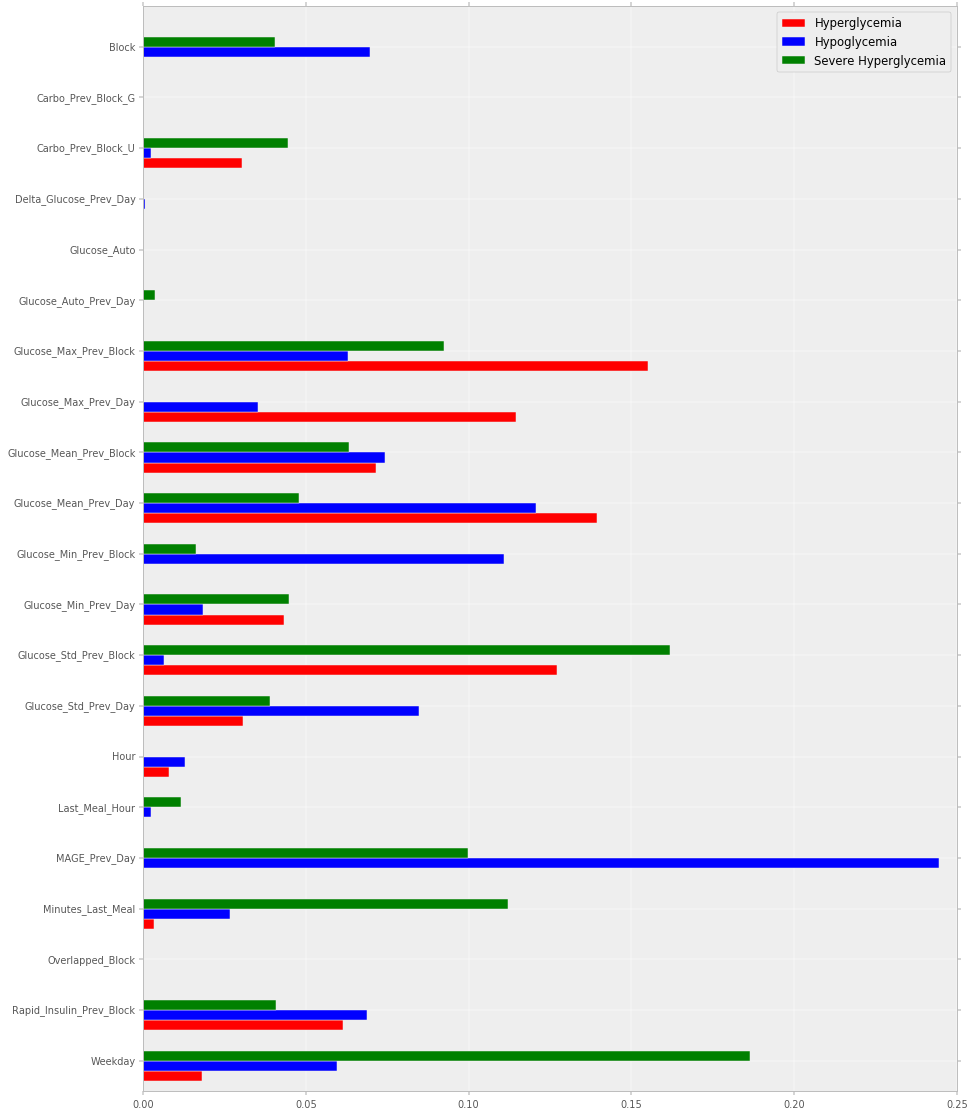

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

width = 0.2
ind = np.arange(len(results_hyper_dt))[::-1]
fig, ax = plt.subplots(figsize=(15, 20), dpi=70)
ax.barh(ind-width, results_hyper_dt, width, color='red', label='Hyperglycemia')
ax.barh(ind , results_hypo_dt, width, color='blue', label='Hypoglycemia')
ax.barh(ind+width, results_severe_dt, width, color='green', label='Severe Hyperglycemia')
ax.set(yticks=ind + width, yticklabels=results_hyper_dt.index, ylim=[3*width - 1, len(results_hyper_dt)])
ax.legend()
plt.show()

In [60]:
fig.savefig('feature_importance_plot.png')